In [116]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [117]:
client=pd.read_csv('C:\\Users\\vishw\\excelr drive files\\Assignments questions of excelr\\Logistic_Regression\\logistic regression cleaned data.csv')
client

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [118]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [119]:
client.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [120]:
columns=['age','balance','duration','campaign','y']
df=client[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
client.drop(['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day', 'month','pdays','previous', 'poutcome'],inplace=True,axis=1)

In [123]:
client.shape

(45211, 5)

In [124]:
client

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


# Checking missing values

In [125]:
client.isnull().sum()

age         0
balance     0
duration    0
campaign    0
y           0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='y'>

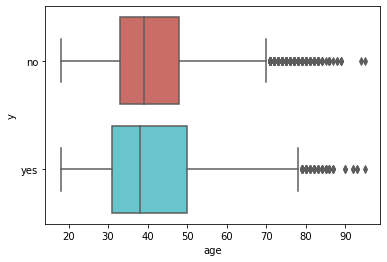

In [126]:
sns.boxplot(x='age',y='y',data=client,palette="hls",)

<AxesSubplot:xlabel='age'>

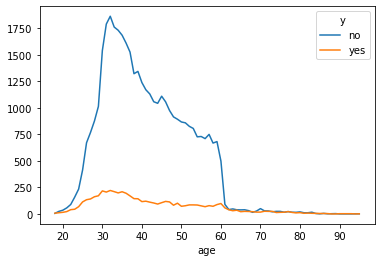

In [127]:
pd.crosstab(df.age,df.y).plot(kind='line')

In [128]:
pd.crosstab(df.age,df.y)

y,no,yes
age,,
18,5,7
19,24,11
20,35,15
21,57,22
22,89,40
...,...,...
90,0,2
92,0,2
93,0,2


<AxesSubplot:>

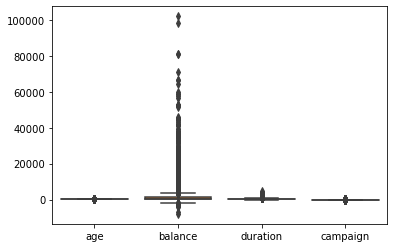

In [129]:
sns.boxplot(data=df)

In [135]:
df['outcome']=df.y.map({'no':0,'yes':1,})
df.tail(5)

<ipython-input-135-6a2d220ac00b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outcome']=df.y.map({'no':0,'yes':1,})


,age,balance,duration,campaign,y,outcome
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


# Logistic Regression and fit the model

In [132]:
client.head()

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1


# Dividing data into input and output variables

In [133]:
from sklearn.linear_model import LogisticRegression

In [136]:
X = df.iloc[:,[0,1,2,3,]]
Y = df.iloc[:,4]
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [137]:
classifier.coef_

array([[ 7.69722482e-03,  3.72191044e-05,  3.54908926e-03,
        -1.39828346e-01]])

In [138]:
classifier.classes_

array(['no', 'yes'], dtype=object)

In [140]:
classifier.intercept_

array([-3.24652389])

In [145]:
classifier.predict_proba(X)

array([[0.87367388, 0.12632612],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553756, 0.69446244],
       [0.82336232, 0.17663768],
       [0.86407826, 0.13592174]])

In [147]:
classifier.score(X,Y)

0.8890756674260689

In [149]:
y_pred = classifier.predict(X)
df["y_pred"] = y_pred
df  

<ipython-input-149-b53afb27d335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"] = y_pred


,age,balance,duration,campaign,y,outcome,y_pred
0,58,2143,261,1,no,0,no
1,44,29,151,1,no,0,no
2,33,2,76,1,no,0,no
3,47,1506,92,1,no,0,no
4,33,1,198,1,no,0,no
...,...,...,...,...,...,...,...
45206,51,825,977,3,yes,1,yes
45207,71,1729,456,2,yes,1,no
45208,72,5715,1127,5,yes,1,yes
45209,57,668,508,4,no,0,no


In [154]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([df,y_prob],axis=1)
new_df

,age,balance,duration,campaign,outcome,y_pred,0,1
0,58,2143,261,1,0,no,0.873674,0.126326
1,44,29,151,1,0,no,0.924887,0.075113
2,33,2,76,1,0,no,0.945963,0.054037
3,47,1506,92,1,0,no,0.933517,0.066483
4,33,1,198,1,0,no,0.919056,0.080944
...,...,...,...,...,...,...,...,...
45206,51,825,977,3,1,yes,0.444056,0.555944
45207,71,1729,456,2,1,no,0.785320,0.214680
45208,72,5715,1127,5,1,yes,0.305538,0.694462
45209,57,668,508,4,0,no,0.823362,0.176638


# confusion matrix for model accuracy

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [157]:
pd.crosstab(y_pred,Y)

y,no,yes
row_0,,
no,39342,4435
yes,580,854


# Checking for accuracy

In [159]:
accuracy=((38342+854)/(39342+580+4435+854))
accuracy

0.8669571564442282

# Classification report

In [160]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(y_pred,Y))

              precision    recall  f1-score   support

          no       0.99      0.90      0.94     43777
         yes       0.16      0.60      0.25      1434

    accuracy                           0.89     45211
   macro avg       0.57      0.75      0.60     45211
weighted avg       0.96      0.89      0.92     45211



# ROC curve

In [190]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [194]:
Logit_roc_score = roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

ValueError: could not convert string to float: 'no'

In [195]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

ValueError: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.